In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Load the data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [8]:
data.columns.isnull().sum()

0

In [9]:
print('# of total transactions: ', data.shape[0])
print('# of fraudulent transactions: ', data.value_counts('Class')[1])
print('# of non-fraudulent transactions: ', data.value_counts('Class')[0])


print('Percentage of fraudulent transactions: ', round(data.value_counts('Class')[1] / data.shape[0] * 100, 2), '%')
print('Percentage of non-fraudulent transactions: ', round(data.value_counts('Class')[0] / data.shape[0] * 100, 2), '%')

# of total transactions:  284807
# of fraudulent transactions:  492
# of non-fraudulent transactions:  284315
Percentage of fraudulent transactions:  0.17 %
Percentage of non-fraudulent transactions:  99.83 %


Veriseti çok dengesiz. Time feature'ı iki transaction arasındaki saniyeyi veriyor yani 172792 saniye bu da 2 gun yapar

/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_34483/3411672619.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



Text(0, 0.5, 'Frequency')

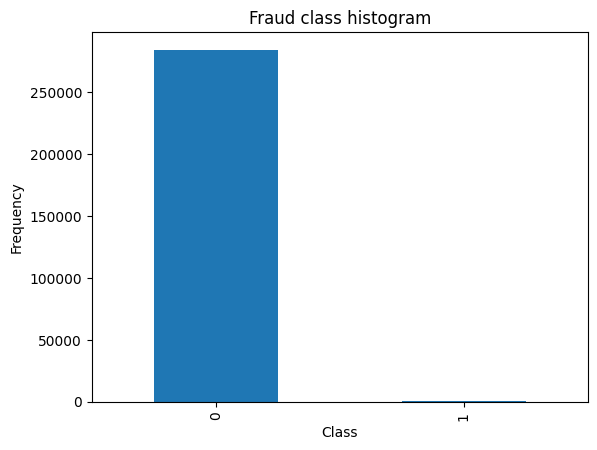

In [10]:
#Class distribution
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


Feature Distributions and Relationships

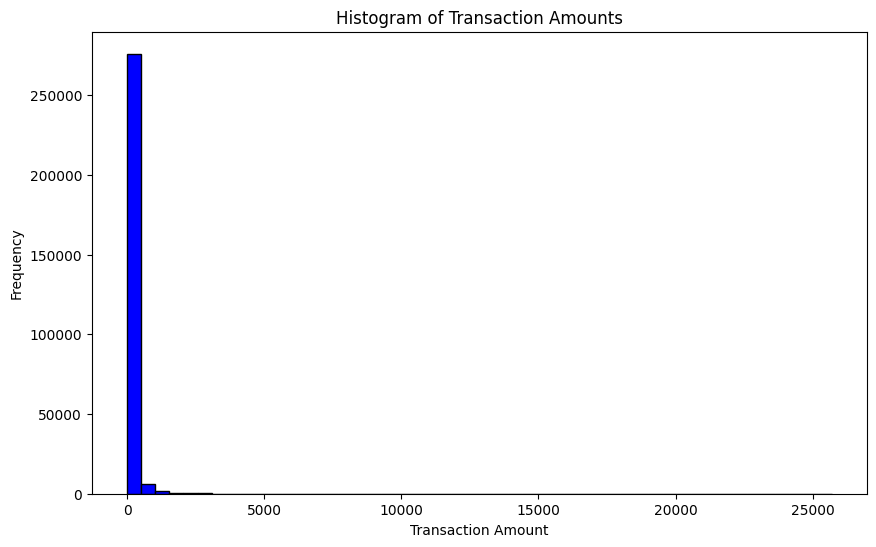

In [11]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Amount' feature
plt.figure(figsize=(10, 6))
plt.hist(data['Amount'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


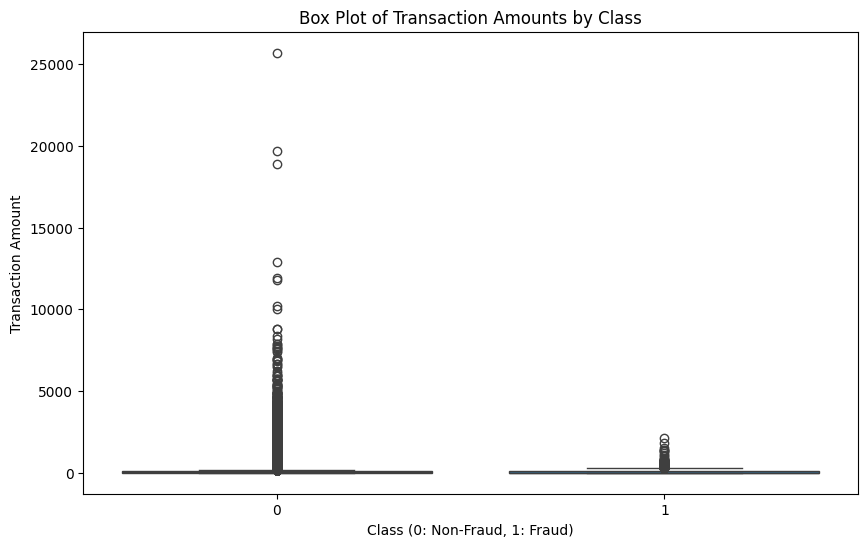

In [12]:
import seaborn as sns

# Plot a box plot of 'Amount' grouped by 'Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Box Plot of Transaction Amounts by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


Biraz outlierlar var ilerisi için kaldırılması düşünülebilir

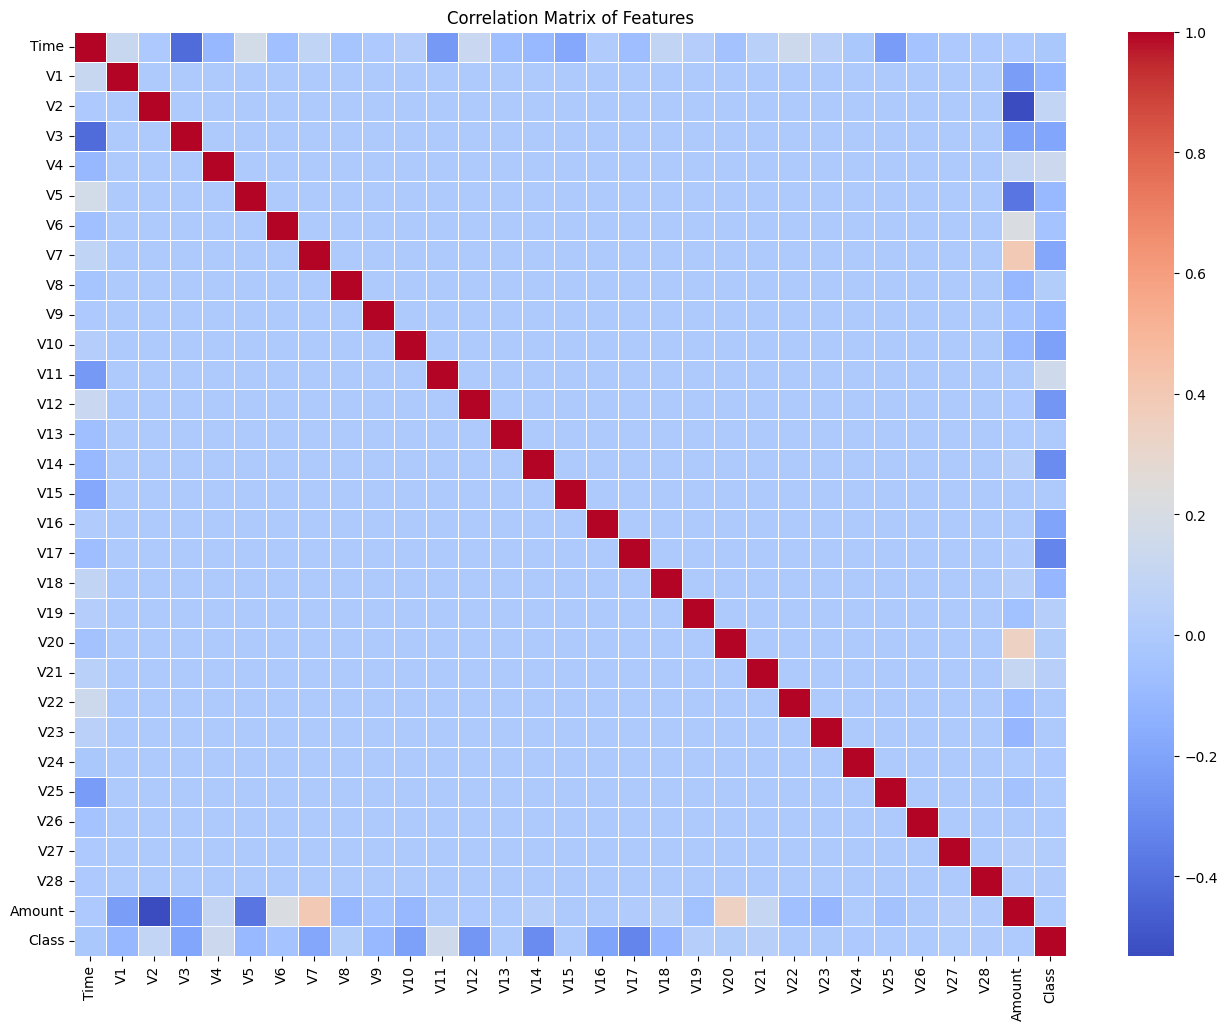

In [13]:
import numpy as np

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


Negative Correlations: V17, V14, V12, V10 bu değerler ne kadar düşük olursa o kadar fraud olmaya yakın olacaktır. 

Positive Correlations: V2, V4, V11, V19 bu değerler ne kadar yüksek olursa o kadar fraud olmaya yakın olacaktır. 

Zamana bağlı transactionlara bakıp acaba belirli bir saat aralığında daha mı çok fraudulent işlem yapılıyor bakmak istiyorum ona göre feature engineering yapıp yapmayacağıma karar vereceğim.

In [14]:
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Fraudulent işlemler gerçek işlemlerden daha eşit dağılımlı yani gece saatlerinde gerçek işlemler düşük de olsa fraudulent işlem sayısı çok düşmüyor.

In [15]:
#Daha detaylı bir inceleme yapmak için saat bazında bakalım
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.00,0,0.00,7712.43,3961,256572.87,64.77,12.99,45615.82
1,0.00,1,0.00,529.00,2,529.00,264.50,264.50,139920.50
2,1.00,0,0.00,1769.69,2215,145806.76,65.83,22.82,20053.62
3,1.00,1,59.00,239.93,2,298.93,149.47,149.47,16367.83
4,2.00,0,0.00,4002.88,1555,106989.39,68.80,17.90,45355.43
...,...,...,...,...,...,...,...,...,...
89,45.00,1,12.31,39.98,2,52.29,26.14,26.14,382.81
90,46.00,0,0.00,25691.16,6458,449369.58,69.58,15.00,132269.35
91,46.00,1,0.00,634.30,6,1433.23,238.87,194.49,67185.06
92,47.00,0,0.00,10199.44,4852,333212.69,68.68,14.00,56123.94


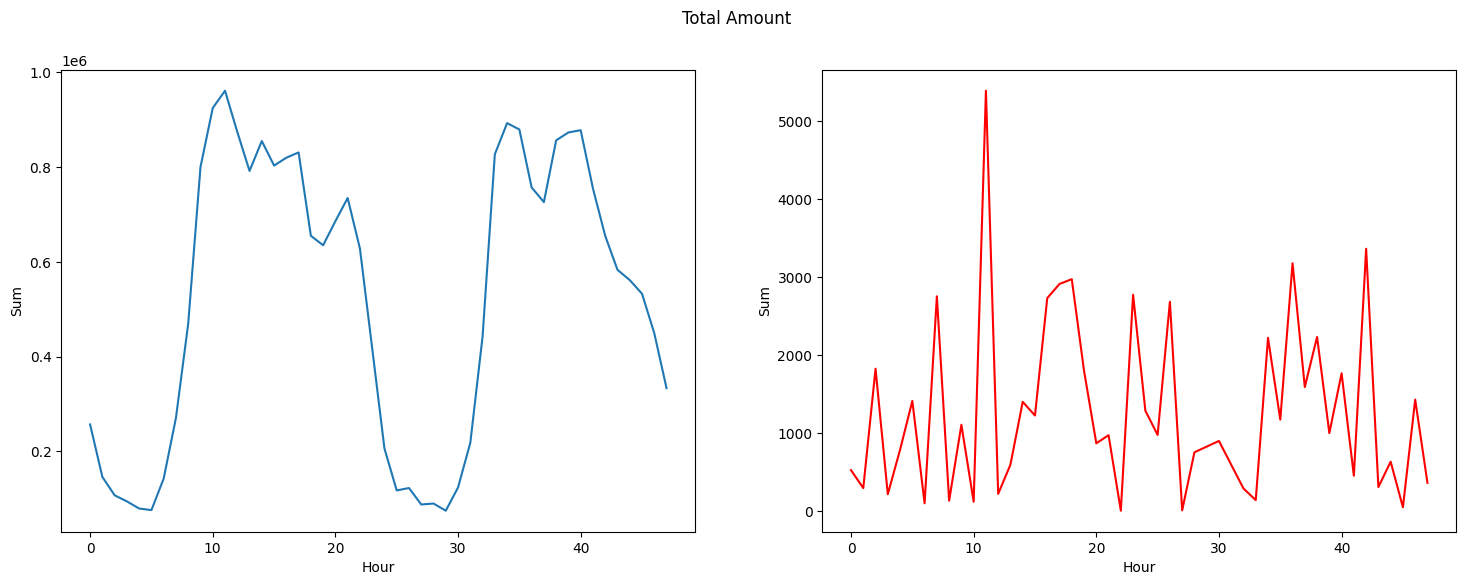

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

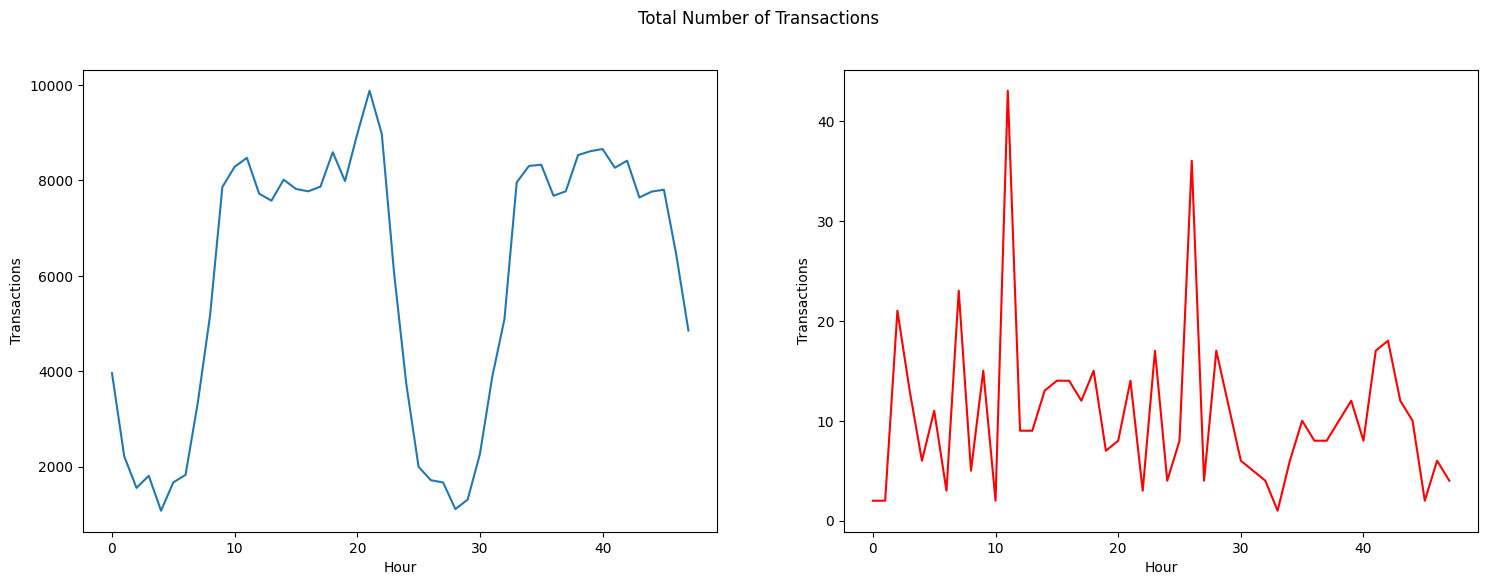

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

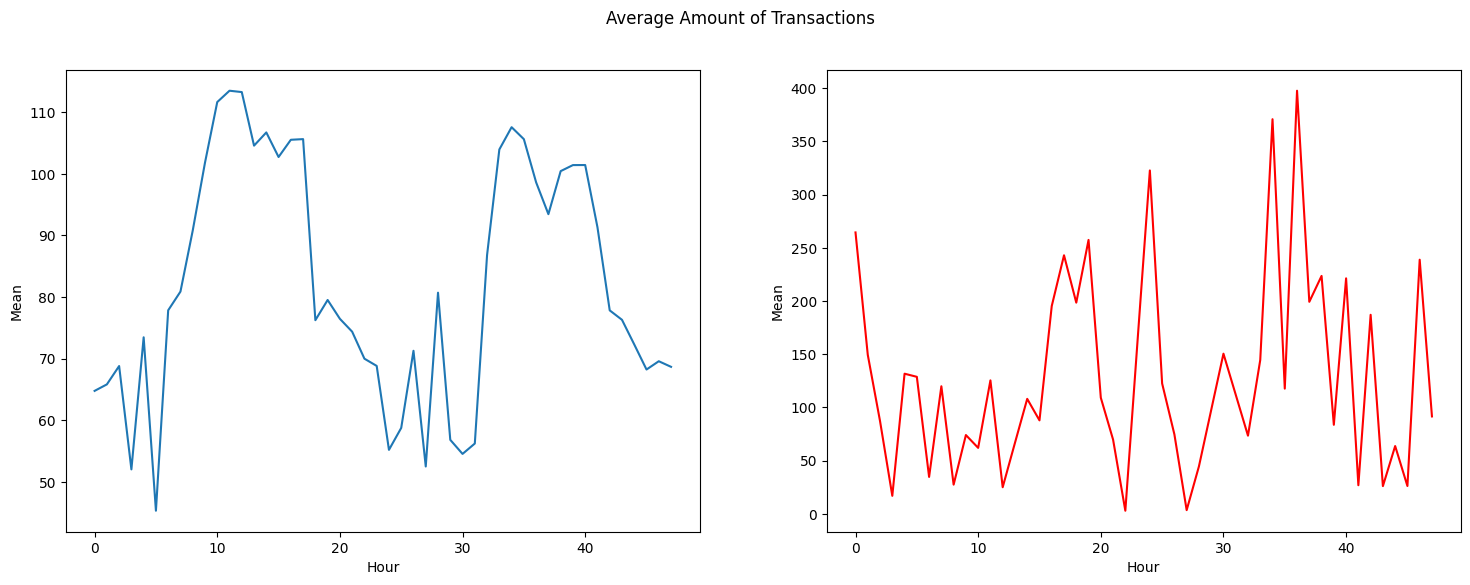

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

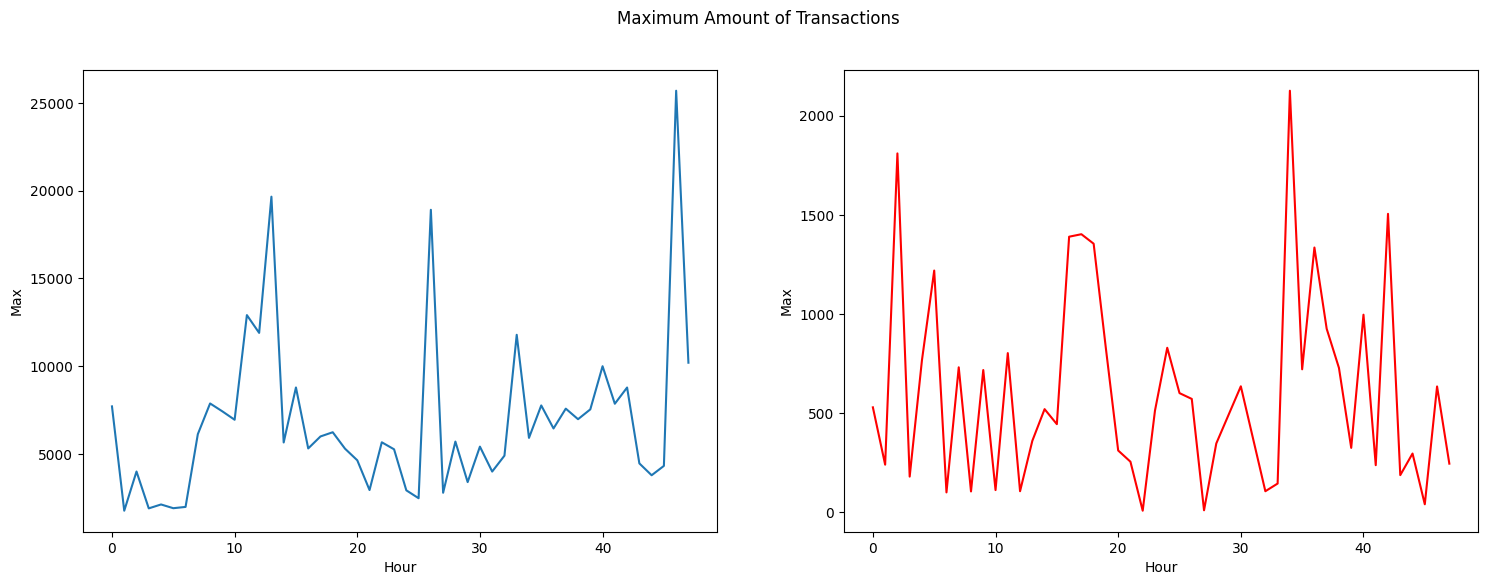

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

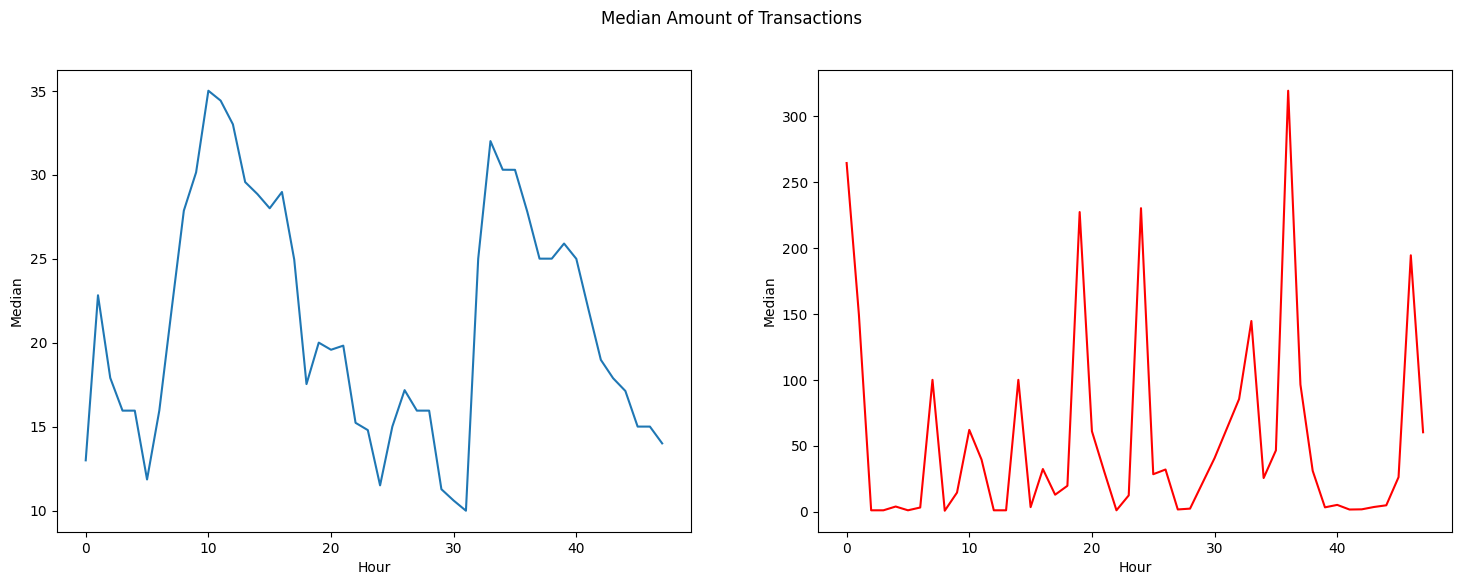

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

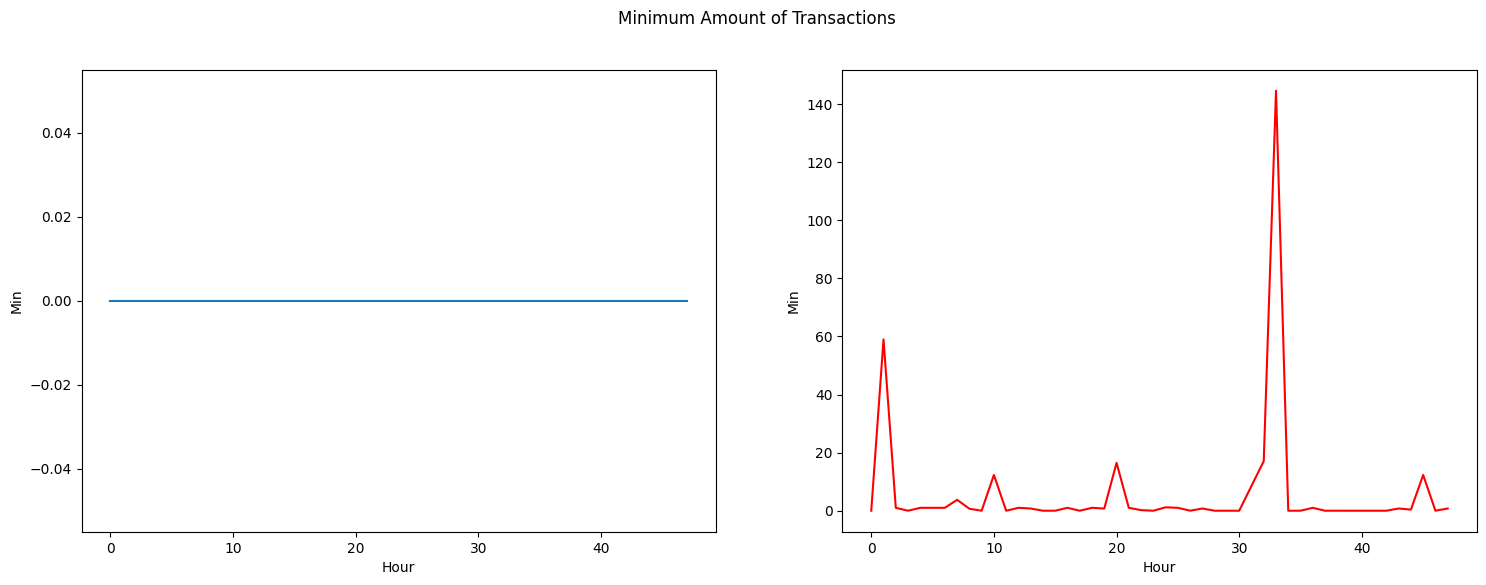

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

Transaction amounts

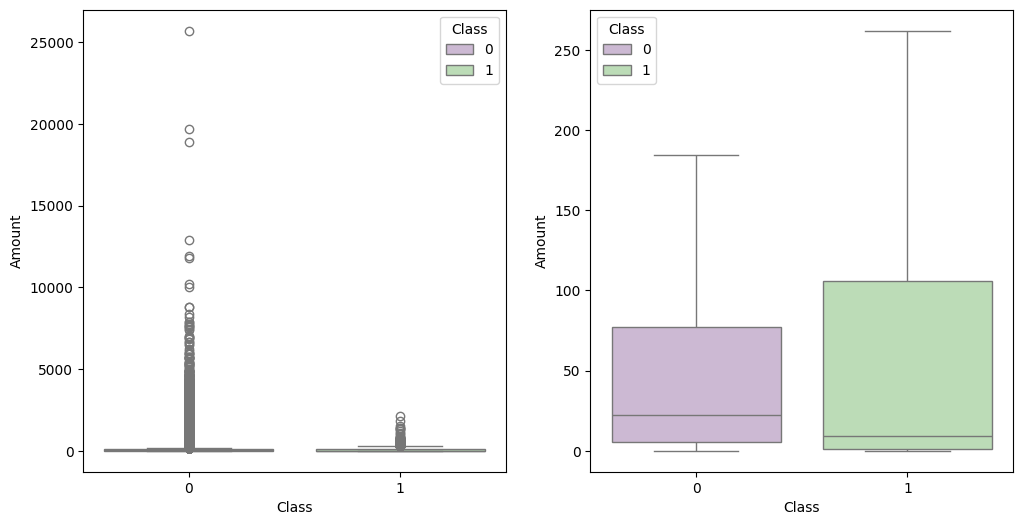

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show();

In [23]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count   284315.00
mean        88.29
std        250.11
min          0.00
25%          5.65
50%         22.00
75%         77.05
max      25691.16
Name: Amount, dtype: float64

In [24]:
class_1.describe()

count    492.00
mean     122.21
std      256.68
min        0.00
25%        1.00
50%        9.25
75%      105.89
max     2125.87
Name: Amount, dtype: float64

fraudların ortalaması, ve q4 daha yüksek. 

In [25]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Perform an 80-20 stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution of classes in the training and testing sets
train_fraudulent_proportion = y_train[y_train == 0].count() / y_train.shape[0]
test_fraudulent_proportion = y_test[y_test == 0].count() / y_test.shape[0]

assert round(train_fraudulent_proportion,2 ) == round(test_fraudulent_proportion, 2)

print('Proportion of fraudulent transactions in the training set: ', round(train_fraudulent_proportion * 100, 2), '%')
print('Proportion of fraudulent transactions in the testing set: ', round(test_fraudulent_proportion * 100, 2), '%')


Proportion of fraudulent transactions in the training set:  99.83 %
Proportion of fraudulent transactions in the testing set:  99.83 %


In [26]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
import pandas as pd
from sklearn.metrics import average_precision_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

def fit_model_get_scores(model, model_name, X_train, y_train, X_test, y_test, **params):
    if params:
        model.set_params(**params)
    
    model.fit(X_train, y_train)
    print(f'Model fit complete: {model_name}')
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    average_precision = average_precision_score(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    
    print(f'Model scoring complete: {model_name}')
    return average_precision, roc_auc, classification_rep

def add_to_performance_df(performance_df, model_name, average_precision, roc_auc, classification_rep, **params):
    precision = classification_rep['1']['precision']
    recall = classification_rep['1']['recall']
    f1 = classification_rep['1']['f1-score']
    
    #convert the params dictionary to a string
    params_str = str(params)
    print(params_str)

    new_row = pd.DataFrame({'Model Name': model_name, 
                            'Average Precision': average_precision, 
                            'ROC AUC': roc_auc, 
                            'Precision': precision, 
                            'Recall': recall, 
                            'F1 Score': f1, 
                            'Parameters': params_str}, index= [0])
    
    # Append the new row to the performance dataframe
    performance_df = pd.concat([performance_df, new_row]).reset_index(drop=True)
    print(f'Model performance added to the performance dataframe: {model_name}')
    return performance_df

def model_performance(model, model_name, X_train, y_train, X_test, y_test, performance_df=None, **params):
    if performance_df is None:
        performance_df = pd.DataFrame()
    
    average_precision, roc_auc, classification_rep = fit_model_get_scores(model, model_name, X_train, y_train, X_test, y_test, **params)
    performance_df = add_to_performance_df(performance_df, model_name, average_precision, roc_auc, classification_rep, **params)
    
    return performance_df


BASELINE MODELS:
- Logistic Regression (linear)
- SVM (linear)
- Decision Tree (tree)
- Random Forest (tree)
- XGBoost (tree, bunu aralarında en iyisi olarak duydum)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Logistic Regression
lr_parameters = {'C': 0.1, 'random_state': 0}
lr = LogisticRegression()
lr_perf_df = model_performance(lr, 'Logistic Regression', X_train_scaled, y_train, X_test_scaled, y_test, **lr_parameters)

# Random Forest Classifier
rf_parameters = {'n_estimators': 50, 'max_depth': 5, 'random_state': 0}
rf = RandomForestClassifier()
rf_perf_df = model_performance(rf, 'Random Forest Classifier', X_train_scaled, y_train, X_test_scaled, y_test, **rf_parameters)

# Decision Tree Classifier
dt_parameters = {'max_depth': 6, 'random_state': 0}
dt = DecisionTreeClassifier()
dt_perf_df = model_performance(dt, 'Decision Tree Classifier', X_train_scaled, y_train, X_test_scaled, y_test, **dt_parameters)

# XGBoost Classifier
xgb_parameters = {'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.1,'random_state': 0}
xgb = XGBClassifier()
xgb_perf_df = model_performance(xgb, 'XGBoost Classifier', X_train_scaled, y_train, X_test_scaled, y_test, **xgb_parameters)





Model fit complete: Logistic Regression
Model scoring complete: Logistic Regression
{'C': 0.1, 'random_state': 0}
Model performance added to the performance dataframe: Logistic Regression
Model fit complete: Random Forest Classifier
Model scoring complete: Random Forest Classifier
{'n_estimators': 50, 'max_depth': 5, 'random_state': 0}
Model performance added to the performance dataframe: Random Forest Classifier
Model fit complete: Decision Tree Classifier
Model scoring complete: Decision Tree Classifier
{'max_depth': 6, 'random_state': 0}
Model performance added to the performance dataframe: Decision Tree Classifier
Model fit complete: XGBoost Classifier
Model scoring complete: XGBoost Classifier
{'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.1, 'random_state': 0}
Model performance added to the performance dataframe: XGBoost Classifier


In [29]:
pd.concat([lr_perf_df, rf_perf_df, dt_perf_df, xgb_perf_df])

,Model Name,Average Precision,ROC AUC,Precision,Recall,F1 Score,Parameters
0,Logistic Regression,0.74,0.96,0.83,0.63,0.72,"{'C': 0.1, 'random_state': 0}"
0,Random Forest Classifier,0.83,0.97,0.89,0.74,0.81,"{'n_estimators': 50, 'max_depth': 5, 'random_s..."
0,Decision Tree Classifier,0.76,0.90,0.92,0.79,0.85,"{'max_depth': 6, 'random_state': 0}"
0,XGBoost Classifier,0.88,0.98,0.90,0.79,0.84,"{'booster': 'gbtree', 'max_depth': 6, 'learnin..."


DEĞERLENDIRME METRICLERI HAKKINDA:
- Daha cok Average Precision'a odaklanacağım çünkü FP ve FN sayısını azaltmak fraud detectionda önemli. Özellikle yakalanamayan fraudlar'ın işlemleri devam edeceğinden sonuçları pahalıya patlayabilir. FP'lerin sonuçları çok ağır olmasa da modelin güveniliriği açısından yine de kötü.
- Yine de genel olarak diğer metriclere önem vereceğim.


In [30]:
#Modelleri Cross Validation ile değerlendirelim
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
classifier = XGBClassifier()

cv_results_ = cross_validate(classifier, X, y, cv=cv,
                             scoring=['roc_auc', 'average_precision', 'balanced_accuracy'],
                             return_estimator=True)
results = round(pd.DataFrame(cv_results_), 3)
results


,fit_time,score_time,estimator,test_roc_auc,test_average_precision,test_balanced_accuracy
0,0.90,0.08,"XGBClassifier(base_score=None, booster=None, c...",0.96,0.82,0.87
1,0.76,0.07,"XGBClassifier(base_score=None, booster=None, c...",0.98,0.87,0.91
2,0.70,0.07,"XGBClassifier(base_score=None, booster=None, c...",0.98,0.87,0.90
3,0.71,0.07,"XGBClassifier(base_score=None, booster=None, c...",0.97,0.88,0.89
4,0.69,0.07,"XGBClassifier(base_score=None, booster=None, c...",0.99,0.87,0.92


In [31]:
#Modelin ortalama değerlerini alalım
results.drop(['estimator'], axis = 1).mean()


fit_time                 0.75
score_time               0.07
test_roc_auc             0.98
test_average_precision   0.86
test_balanced_accuracy   0.90
dtype: float64

In [78]:
#Modelleri GridSearchCV ile değerlendirebileceğimiz bir fonksiyon yazalım
from sklearn.model_selection import GridSearchCV

all_grid_search_results = pd.DataFrame()

def grid_search_for_all_models(models, params, X_scaled, y):
     
    all_performances = pd.DataFrame()

    
    for model_name, model in models.items():

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        grid_search = GridSearchCV(model, params[model_name], 
                                scoring=['roc_auc', 'average_precision', 'balanced_accuracy'], 
                                   n_jobs=-1, 
                                   cv = cv,
                                   refit= 'average_precision')
        
        grid_search.fit(X, y)
        print(f'Grid search complete for {model_name}')

        
        grid_search_results = grid_search.cv_results_
        grid_search_results = pd.DataFrame(grid_search_results)
       
        grid_search_results['Model Name'] = model_name
        all_performances = pd.concat([all_performances, grid_search_results])
        print(f'Grid search results added to the performance dataframe: {model_name}')
    
    return all_performances


# Define the models and their respective hyperparameters
models = {'Logistic Regression': LogisticRegression(),
          'XGBoost Classifier': XGBClassifier(),
          'Random Forest Classifier': RandomForestClassifier(),
          'Decision Tree Classifier': DecisionTreeClassifier()}

params = {'Logistic Regression': {'C': [0.1,1,10,100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
            'XGBoost Classifier': {'max_depth': [3,6,9], 'learning_rate': [0.1, 0.3],'n_estimators':[25,50,100]},
            'Random Forest Classifier': {'n_estimators': [25, 50, 100], 'max_depth': [5, 10]},
            'Decision Tree Classifier': {'max_depth': [2,3,4,5,6,7,8,9,10,20,50]}}
# Perform grid search for all models

grid_search_results = grid_search_for_all_models(models, params, X_scaled, y)
grid_search_results




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py

Grid search complete for Logistic Regression
Grid search results added to the performance dataframe: Logistic Regression
Grid search complete for XGBoost Classifier
Grid search results added to the performance dataframe: XGBoost Classifier
Grid search complete for Random Forest Classifier
Grid search results added to the performance dataframe: Random Forest Classifier
Grid search complete for Decision Tree Classifier
Grid search results added to the performance dataframe: Decision Tree Classifier


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_roc_auc,split1_test_roc_auc,...,split2_test_balanced_accuracy,split3_test_balanced_accuracy,split4_test_balanced_accuracy,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,Model Name,param_learning_rate,param_max_depth,param_n_estimators
0,13.30,8.59,0.07,0.02,0.10,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.97,0.98,...,0.78,0.80,0.81,0.80,0.02,4,Logistic Regression,NaN,NaN,NaN
1,2.72,0.22,0.05,0.01,0.10,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.90,0.94,...,0.79,0.82,0.77,0.80,0.02,5,Logistic Regression,NaN,NaN,NaN
2,19.34,19.22,0.04,0.01,1.00,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.97,0.97,...,0.78,0.81,0.83,0.81,0.02,3,Logistic Regression,NaN,NaN,NaN
3,2.19,0.20,0.04,0.00,1.00,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.90,0.94,...,0.77,0.82,0.79,0.80,0.02,6,Logistic Regression,NaN,NaN,NaN
4,52.00,37.29,0.04,0.01,10.00,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.97,0.97,...,0.78,0.81,0.84,0.81,0.02,1,Logistic Regression,NaN,NaN,NaN
5,2.19,0.22,0.06,0.02,10.00,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.90,0.94,...,0.77,0.82,0.79,0.80,0.02,6,Logistic Regression,NaN,NaN,NaN
6,13.64,15.42,0.04,0.01,100.00,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.97,0.97,...,0.78,0.81,0.83,0.81,0.02,2,Logistic Regression,NaN,NaN,NaN
7,2.23,0.19,0.05,0.01,100.00,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.90,0.94,...,0.77,0.82,0.79,0.80,0.02,6,Logistic Regression,NaN,NaN,NaN
0,1.39,0.03,0.06,0.01,NaN,NaN,NaN,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.95,0.96,...,0.88,0.89,0.89,0.88,0.01,18,XGBoost Classifier,0.10,3.00,25.00
1,1.58,0.08,0.08,0.00,NaN,NaN,NaN,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.97,0.97,...,0.89,0.89,0.90,0.89,0.01,16,XGBoost Classifier,0.10,3.00,50.00


In [83]:
grid_search_results.columns
#Eğer bir column ismi split ile başlıyorsa onu silelim
split_cols = [col for col in grid_search_results.columns if col.startswith('split')]
grid_search_results.drop(split_cols, axis=1, inplace=True)
#Eğer bir column ismi rank ile başlıyorsa onu silelim
split_cols = [col for col in grid_search_results.columns if col.startswith('rank')]
grid_search_results.drop(split_cols, axis=1, inplace=True)
#Eğer bir columns ismi std ile başlıyorsa onu silelim
split_cols = [col for col in grid_search_results.columns if col.startswith('std')]
grid_search_results.drop(split_cols, axis=1, inplace=True)
split_cols = ['params']
grid_search_results.drop(split_cols, axis=1, inplace=True)

KeyError: "['params'] not found in axis"

In [90]:
#Columnların sırasını değiştirelim
grid_search_results = grid_search_results[['Model Name', 'mean_test_roc_auc', 'mean_test_average_precision', 'mean_test_balanced_accuracy', 'param_max_depth', 'param_n_estimators', 'param_learning_rate', 'param_C','param_penalty', 'param_solver']]
grid_search_results

,Model Name,mean_test_roc_auc,mean_test_average_precision,mean_test_balanced_accuracy,param_max_depth,param_n_estimators,param_learning_rate,param_C,param_penalty,param_solver
0,Logistic Regression,0.98,0.76,0.80,NaN,NaN,NaN,0.10,l1,liblinear
1,Logistic Regression,0.92,0.58,0.80,NaN,NaN,NaN,0.10,l2,liblinear
2,Logistic Regression,0.98,0.76,0.81,NaN,NaN,NaN,1.00,l1,liblinear
3,Logistic Regression,0.91,0.57,0.80,NaN,NaN,NaN,1.00,l2,liblinear
4,Logistic Regression,0.98,0.76,0.81,NaN,NaN,NaN,10.00,l1,liblinear
5,Logistic Regression,0.91,0.57,0.80,NaN,NaN,NaN,10.00,l2,liblinear
6,Logistic Regression,0.98,0.76,0.81,NaN,NaN,NaN,100.00,l1,liblinear
7,Logistic Regression,0.91,0.57,0.80,NaN,NaN,NaN,100.00,l2,liblinear
0,XGBoost Classifier,0.95,0.81,0.88,3.00,25.00,0.10,NaN,NaN,NaN
1,XGBoost Classifier,0.97,0.83,0.89,3.00,50.00,0.10,NaN,NaN,NaN


In [80]:
#Plot the grid search results vs hyperparameters
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grid_search_results(grid_search_results, model_name, hyperparameters):
    fig, ax = plt.subplots(2, len(hyperparameters), figsize=(10, 10))

    for i, hyperparam in enumerate(hyperparameters):
        sns.lineplot(x=hyperparam, y='mean_test_average_precision', data=grid_search_results[grid_search_results['Model Name'] == model_name], ax=ax[0][i])
        ax[0][i].set_xlabel(hyperparam)
        ax[0][i].set_ylabel('Mean Test Average Precision')

    for i, hyperparam in enumerate(hyperparameters):
        sns.lineplot(x=hyperparam, y='mean_test_roc_auc', data=grid_search_results[grid_search_results['Model Name'] == model_name], ax=ax[1][i])
        ax[1][i].set_xlabel(hyperparam)
        ax[1][i].set_ylabel('Mean Test ROC AUC')

    plt.tight_layout()
    plt.show()



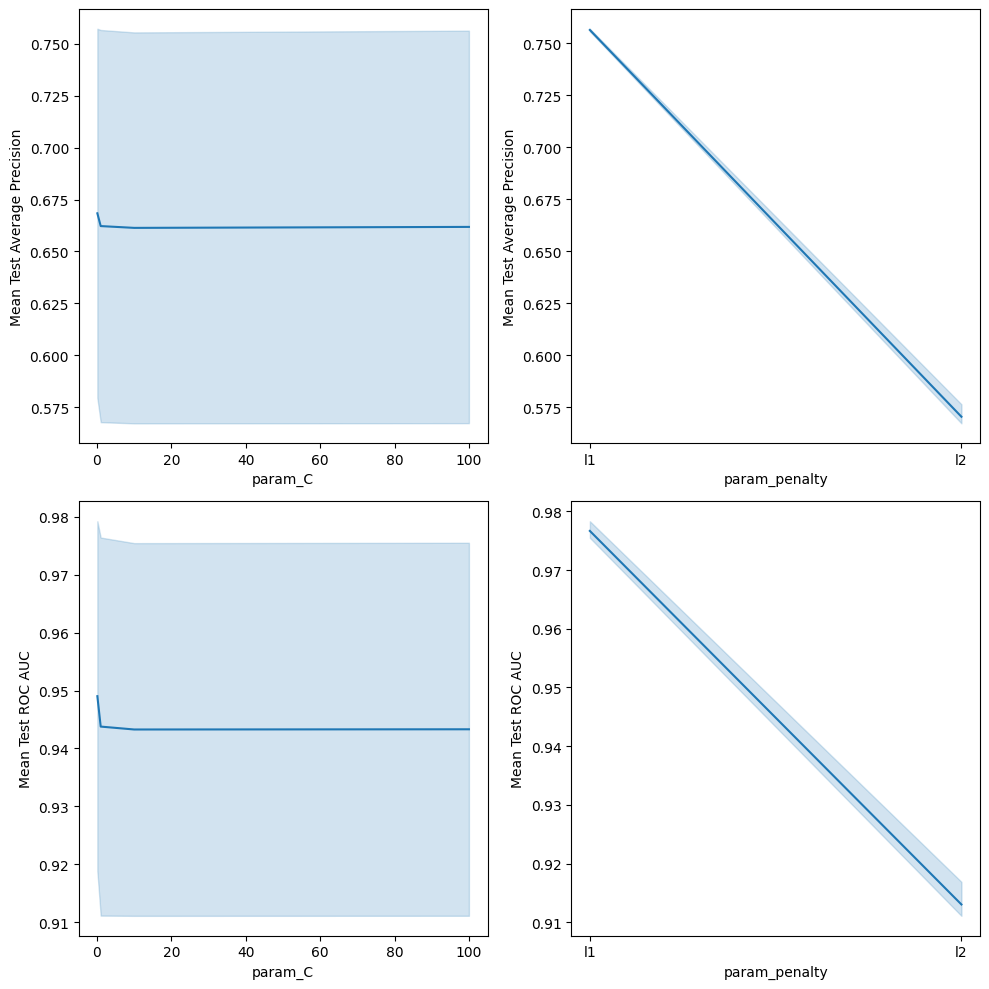

In [91]:
plot_grid_search_results(grid_search_results, 'Logistic Regression', ['param_C', 'param_penalty'])

Best Logistic Regression 
    C = 100 penalty = l1

   AUC ROC: 0.98	AP: 0.76	BALANCED ACCURACY: 0.81	

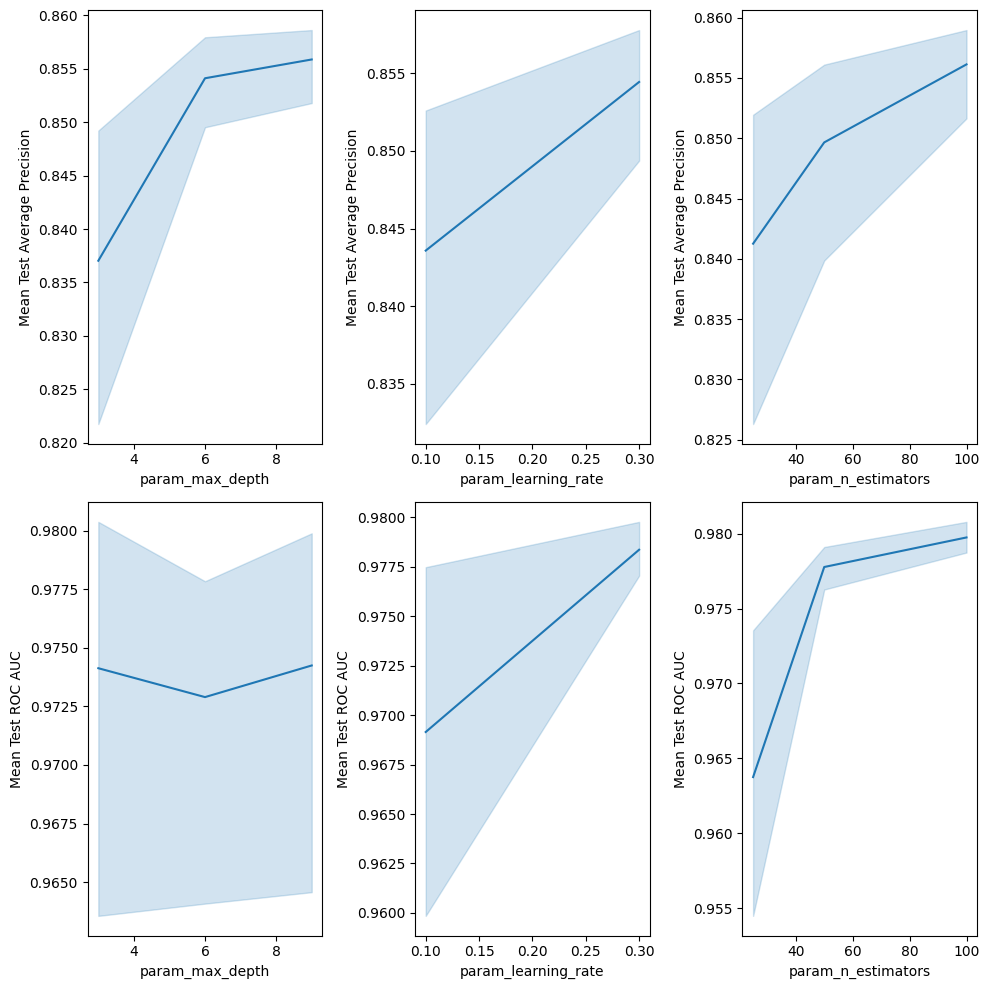

In [94]:
#Best model XGBoost Classifier
plot_grid_search_results(grid_search_results, 'XGBoost Classifier', ['param_max_depth', 'param_learning_rate', 'param_n_estimators'])

En iyi XGBoost 
    max_depth = 9, lr = 0.3, n_estimators = 100 /
    
    AUC ROC = 0.98, AP =0.86 balanced accuracy = 0.90	

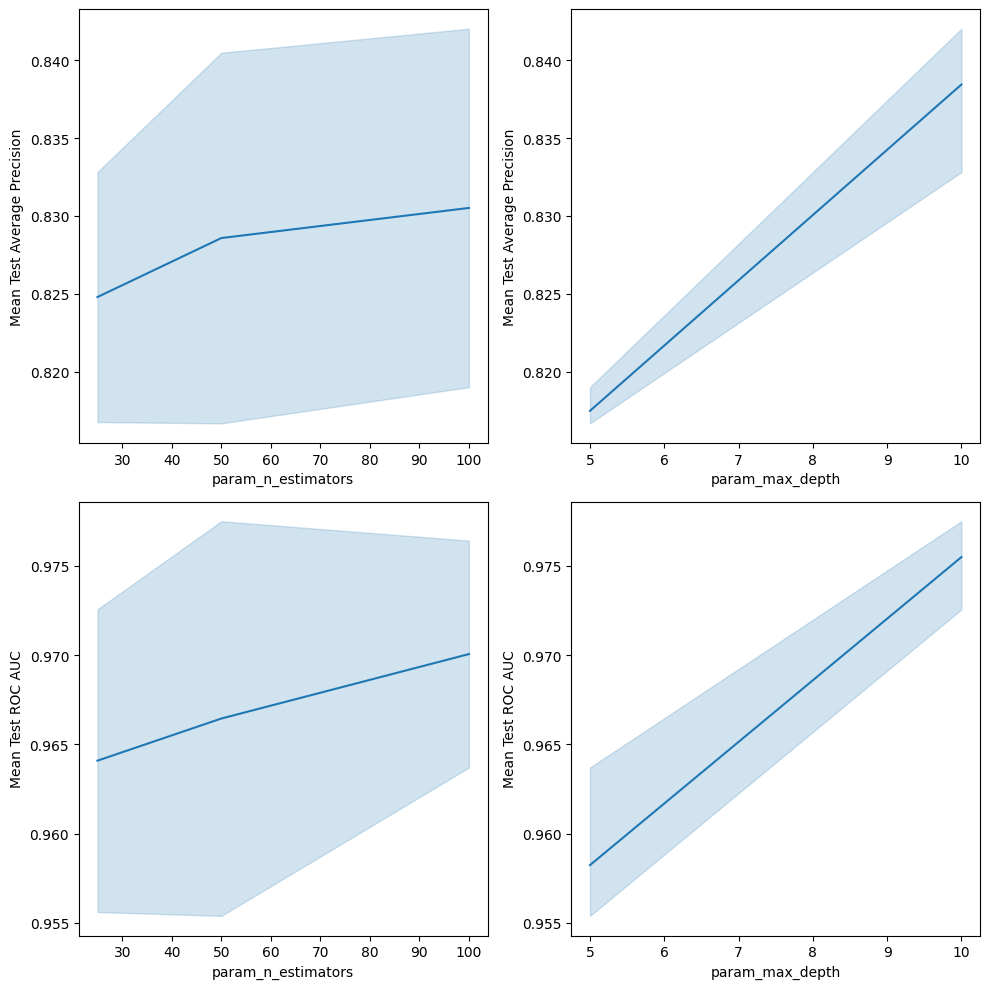

In [95]:
#Best model Random Forest Classifier
plot_grid_search_results(grid_search_results, 'Random Forest Classifier', ['param_n_estimators', 'param_max_depth'])

En iyi random forest 

n_estimators = 100
max_depth = 10

    AUC ROC = 0.98	AP = 0.84	Balanced Accuracy = 0.89	
ama train süresi 94.39

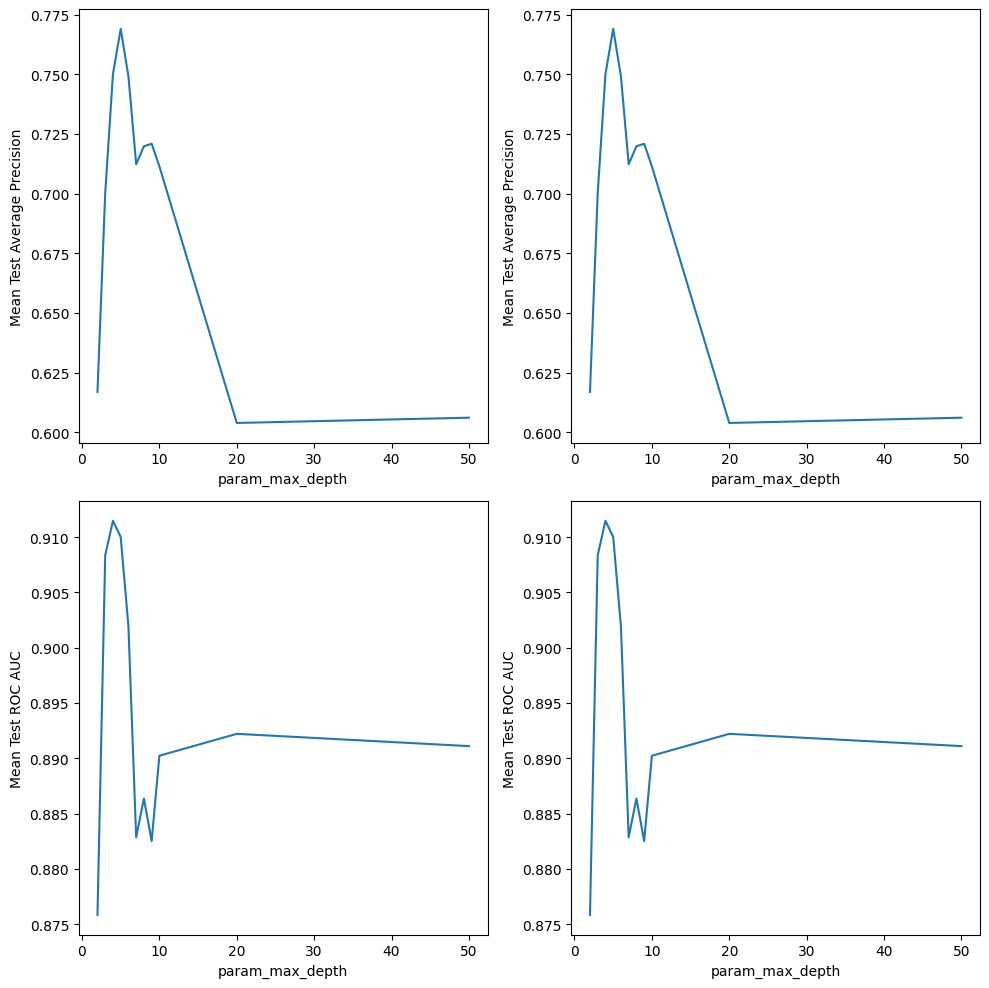

In [97]:
#En iyi Decision Tree Classifier
plot_grid_search_results(grid_search_results, 'Decision Tree Classifier', ['param_max_depth', 'param_max_depth'])

Hemen overfit olduğunu görebiliyoruz
En iyi Decision Tree
max_depth = 6

    AUC ROC:0.91	AP: 0.76	BA: 0.89	



XGBoost'u ana model olarak seçip hızlı çalışan modelleri de belki iyi hale getirebilirim diye,

- Imbalanced learning teknikleri:
    - Cost Sensitive Learning

    - Resampling Strategies:
        - OverSampling: SMOTE

'ni kullanarak veri ile oynayıp modellerin performanslarını yükseltmeye calisacagim



In [78]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, annot_kws={'fontsize': 15})
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Model fit complete: Vanilla Logistic Regression
Model scoring complete: Vanilla Logistic Regression
{}
Model performance added to the performance dataframe: Vanilla Logistic Regression
Model fit complete: Weighted Logistic Regression
Model scoring complete: Weighted Logistic Regression
{}
Model performance added to the performance dataframe: Weighted Logistic Regression


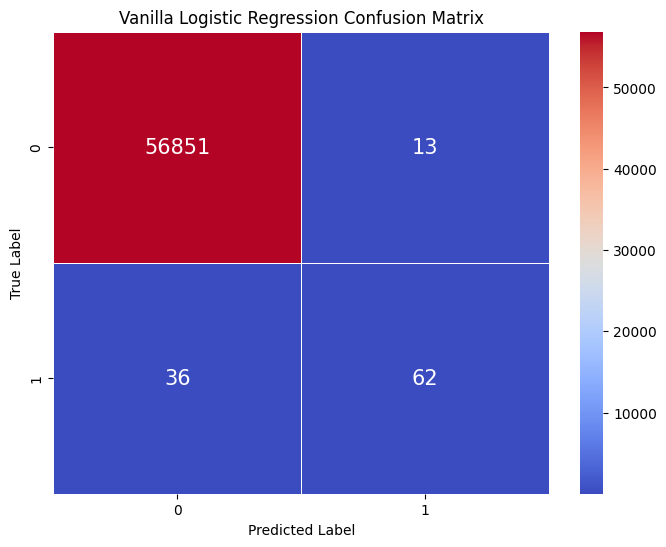

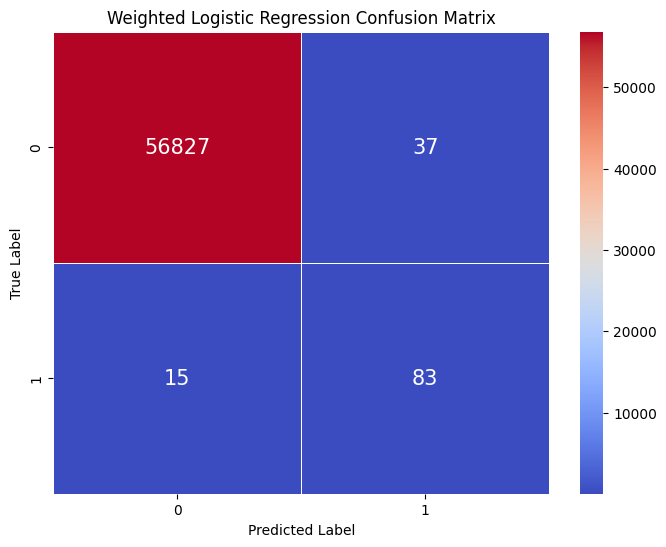

<Figure size 640x480 with 0 Axes>

In [104]:
#Weighted Logistic Regression

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


vanilla_lr = LogisticRegression(C=0.1, random_state=0)
vanilla_lr_perf_df = model_performance(vanilla_lr, 'Vanilla Logistic Regression', X_train_scaled, y_train, X_test_scaled, y_test)
weighted_lr = LogisticRegression(C=0.1, class_weight={0:1, 1:10}, random_state=0)
weighted_lr_perf_df = model_performance(weighted_lr, 'Weighted Logistic Regression', X_train_scaled, y_train, X_test_scaled, y_test)

vanilla_preds = vanilla_lr.predict(X_test_scaled)
weighted_preds = weighted_lr.predict(X_test_scaled)

# Plot the confusion matrix for the vanilla logistic regression model
plot_confusion_matrix(y_test, vanilla_preds, 'Vanilla Logistic Regression')

# Plot the confusion matrix for the weighted logistic regression model
plot_confusion_matrix(y_test, weighted_preds, 'Weighted Logistic Regression')
plt.tight_layout()


In [105]:
pd.concat([vanilla_lr_perf_df, weighted_lr_perf_df])

,Model Name,Average Precision,ROC AUC,Precision,Recall,F1 Score,Parameters
0,Vanilla Logistic Regression,0.74,0.96,0.83,0.63,0.72,{}
0,Weighted Logistic Regression,0.75,0.97,0.69,0.85,0.76,{}


Logistic Regressionda baya iyi sonuça ldık

In [113]:
#Weighted XGBoost Classifier

vanilla_xgb = XGBClassifier(booster='gbtree', max_depth=9, learning_rate=0.3, random_state=0)
vanilla_xgb.fit(X_train_scaled, y_train)
vanilla_xgb_preds = vanilla_xgb.predict(X_test_scaled)

weighted_xgb = XGBClassifier(booster='gbtree', max_depth=9, learning_rate=0.3, scale_pos_weight=10, random_state=0)
weighted_xgb.fit(X_train_scaled, y_train)
weighted_xgb_preds = weighted_xgb.predict(X_test_scaled)

weighted_xgb_perf_df = model_performance(weighted_xgb, 'Weighted XGBoost Classifier', X_train_scaled, y_train, X_test_scaled, y_test)
vanilla_xgb_perf_df = model_performance(vanilla_xgb, 'Vanilla XGBoost Classifier', X_train_scaled, y_train, X_test_scaled, y_test)


# Plot the confusion matrix for the vanilla XGBoost model
plot_confusion_matrix(y_test, vanilla_xgb_preds, 'Vanilla XGBoost Classifier')

# Plot the confusion matrix for the weighted XGBoost model
plot_confusion_matrix(y_test, weighted_xgb_preds, 'Weighted XGBoost Classifier')

plt.tight_layout()



SMOTE

Model fit complete: SMOTE Logistic Regression
Model scoring complete: SMOTE Logistic Regression
{}
Model performance added to the performance dataframe: SMOTE Logistic Regression
Model fit complete: Logistic Regression
Model scoring complete: Logistic Regression
{}
Model performance added to the performance dataframe: Logistic Regression


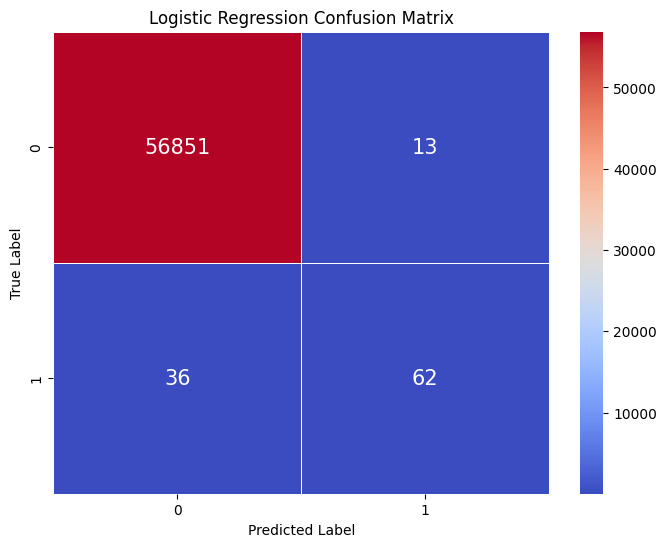

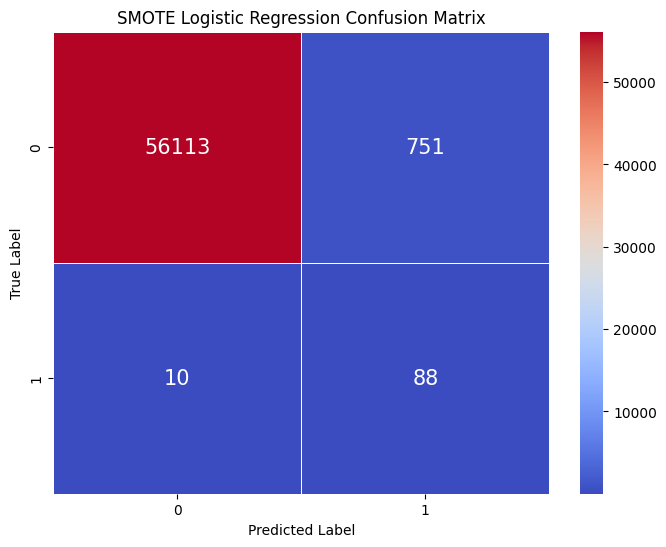

,Model Name,Average Precision,ROC AUC,Precision,Recall,F1 Score,Parameters
0,Logistic Regression,0.74,0.96,0.83,0.63,0.72,{}
0,SMOTE Logistic Regression,0.72,0.97,0.10,0.90,0.19,{}


In [106]:
#Smote for Logistic Regression

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=0)

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

smote_lr = LogisticRegression(C=0.1, random_state=0)
smote_lr.fit(X_train_smote, y_train_smote)
smote_preds = smote_lr.predict(X_test_scaled)

smote_lr_perf_df = model_performance(smote_lr, 'SMOTE Logistic Regression', X_train_smote, y_train_smote, X_test_scaled, y_test)

lr = LogisticRegression(C = 0.1, random_state = 0)
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)

lr_perf_df = model_performance(lr, 'Logistic Regression', X_train_scaled, y_train, X_test_scaled, y_test)

# Plot the confusion matrix for the logistic regression model
plot_confusion_matrix(y_test, y_preds, 'Logistic Regression')

# Plot the confusion matrix for the SMOTE logistic regression model
plot_confusion_matrix(y_test, smote_preds, 'SMOTE Logistic Regression')

pd.concat([lr_perf_df, smote_lr_perf_df])




TP'lerimizi yükselttik fakat FP sayısı cok yuksek

Model fit complete: Vanilla XGBoost Classifier
Model scoring complete: Vanilla XGBoost Classifier
{}
Model performance added to the performance dataframe: Vanilla XGBoost Classifier
Model fit complete: Resampled XGBoost Classifier
Model scoring complete: Resampled XGBoost Classifier
{}
Model performance added to the performance dataframe: Resampled XGBoost Classifier


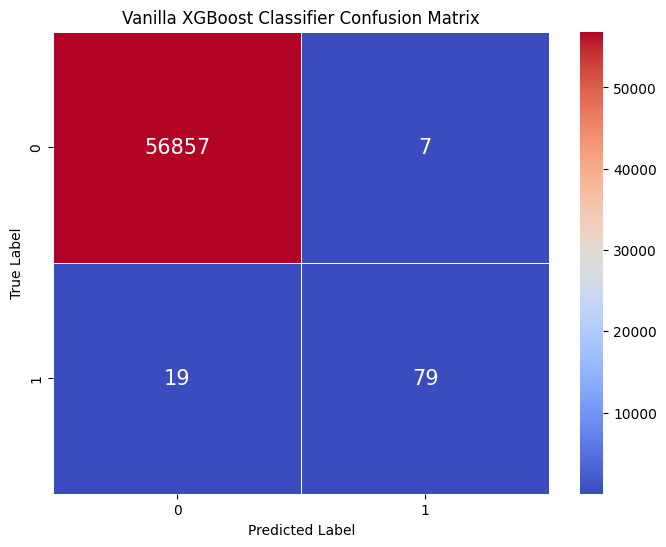

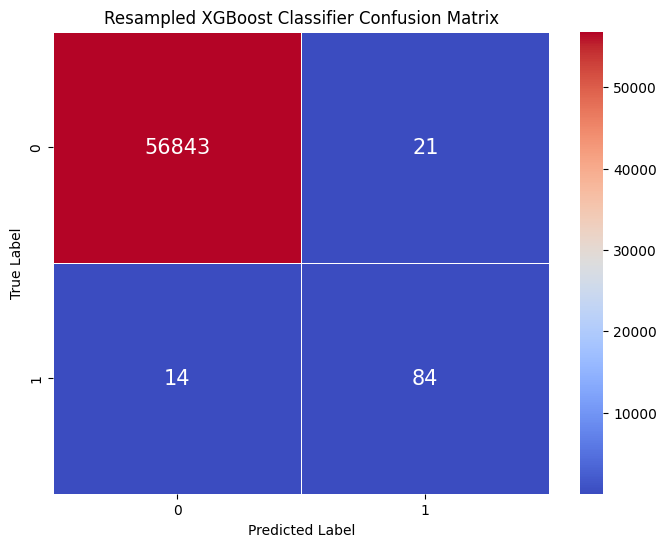

,Model Name,Average Precision,ROC AUC,Precision,Recall,F1 Score,Parameters
0,Vanilla XGBoost Classifier,0.88,0.97,0.92,0.81,0.86,{}
0,Resampled XGBoost Classifier,0.87,0.98,0.80,0.86,0.83,{}


In [107]:
#SMOTE for XGBoost Classifier
smote = SMOTE(sampling_strategy=0.5, random_state=0)

vanilla_xgb = XGBClassifier(booster='gbtree', max_depth=9, learning_rate=0.3, random_state=0)
vanilla_xgb.fit(X_train_scaled, y_train)
vanilla_xgb_preds = vanilla_xgb.predict(X_test_scaled)

vanilla_xgb_perf_df = model_performance(vanilla_xgb, 'Vanilla XGBoost Classifier', X_train_scaled, y_train, X_test_scaled, y_test)

resampled_xgb = XGBClassifier(booster='gbtree', max_depth=9, learning_rate=0.3, random_state=0)
resampled_xgb.fit(X_train_smote, y_train_smote)
resampled_xgb_preds = resampled_xgb.predict(X_test_scaled)

resampled_xgb_perf_df = model_performance(resampled_xgb, 'Resampled XGBoost Classifier', X_train_smote, y_train_smote, X_test_scaled, y_test)

# Plot the confusion matrix for the vanilla XGBoost classifier
plot_confusion_matrix(y_test, vanilla_xgb_preds, 'Vanilla XGBoost Classifier')

# Plot the confusion matrix for the resampled XGBoost classifier
plot_confusion_matrix(y_test, resampled_xgb_preds, 'Resampled XGBoost Classifier')

pd.concat([vanilla_xgb_perf_df, resampled_xgb_perf_df])




FP sayımızı arttırdık

Model fit complete: Vanilla Decision Tree Classifier
Model scoring complete: Vanilla Decision Tree Classifier
{}
Model performance added to the performance dataframe: Vanilla Decision Tree Classifier
Model fit complete: Resampled Decision Tree Classifier
Model scoring complete: Resampled Decision Tree Classifier
{}
Model performance added to the performance dataframe: Resampled Decision Tree Classifier


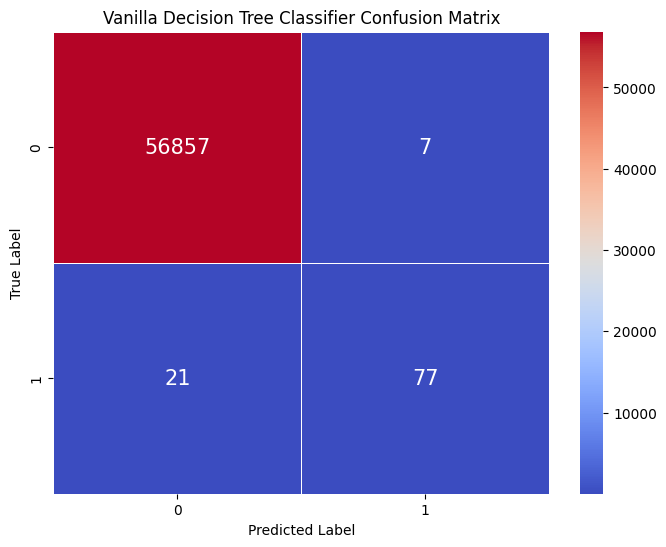

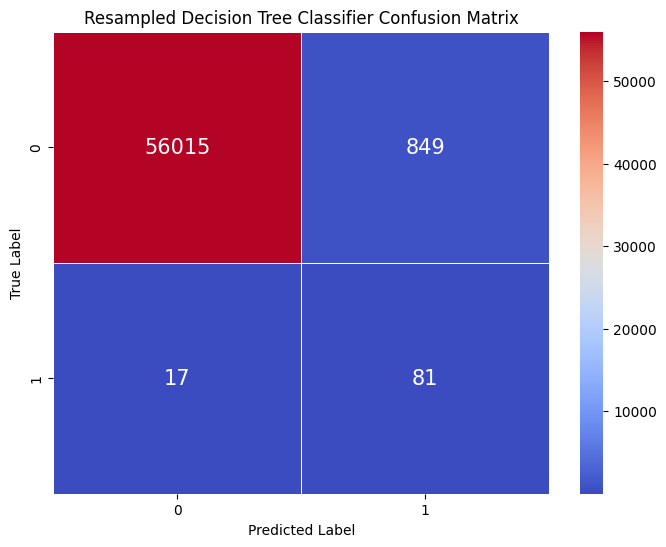

,Model Name,Average Precision,ROC AUC,Precision,Recall,F1 Score,Parameters
0,Vanilla Decision Tree Classifier,0.76,0.90,0.92,0.79,0.85,{}
0,Resampled Decision Tree Classifier,0.57,0.91,0.09,0.83,0.16,{}


In [108]:
#SMOTE for Decison Tree Classifier
smote = SMOTE(sampling_strategy=0.5, random_state=0)

vanilla_dt = DecisionTreeClassifier(max_depth=6, random_state=0)
vanilla_dt.fit(X_train_scaled, y_train)
vanilla_dt_preds = vanilla_dt.predict(X_test_scaled)

vanilla_dt_perf_df = model_performance(vanilla_dt, 'Vanilla Decision Tree Classifier', X_train_scaled, y_train, X_test_scaled, y_test)

resampled_dt = DecisionTreeClassifier(max_depth=6, random_state=0)
resampled_dt.fit(X_train_smote, y_train_smote)
resampled_dt_preds = resampled_dt.predict(X_test_scaled)

resampled_dt_perf_df = model_performance(resampled_dt, 'Resampled Decision Tree Classifier', X_train_smote, y_train_smote, X_test_scaled, y_test)

# Plot the confusion matrix for the vanilla Decision Tree classifier
plot_confusion_matrix(y_test, vanilla_dt_preds, 'Vanilla Decision Tree Classifier')

# Plot the confusion matrix for the resampled Decision Tree classifier
plot_confusion_matrix(y_test, resampled_dt_preds, 'Resampled Decision Tree Classifier')

pd.concat([vanilla_dt_perf_df, resampled_dt_perf_df])


çok kötü oldu

In [109]:
#Under Sampling
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Perform an 80-20 stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the undersampler
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=0)

# Fit the undersampler to the training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

# Check the number of samples in the undersampled data
print('Number of samples in the original training set: ', X_train_scaled.shape[0])
print('Number of samples in the undersampled training set: ', X_train_undersampled.shape[0])

# Check the class distribution in the undersampled data
print('Class distribution in the original training set: ')
print(y_train.value_counts())

print('Class distribution in the undersampled training set: ')
print(pd.Series(y_train_undersampled).value_counts())



Number of samples in the original training set:  227845
Number of samples in the undersampled training set:  1182
Class distribution in the original training set: 
Class
0    227451
1       394
Name: count, dtype: int64
Class distribution in the undersampled training set: 
Class
0    788
1    394
Name: count, dtype: int64


Model fit complete: Vanilla Logistic Regression
Model scoring complete: Vanilla Logistic Regression
{}
Model performance added to the performance dataframe: Vanilla Logistic Regression
Model fit complete: Undersampled Logistic Regression
Model scoring complete: Undersampled Logistic Regression
{}
Model performance added to the performance dataframe: Undersampled Logistic Regression


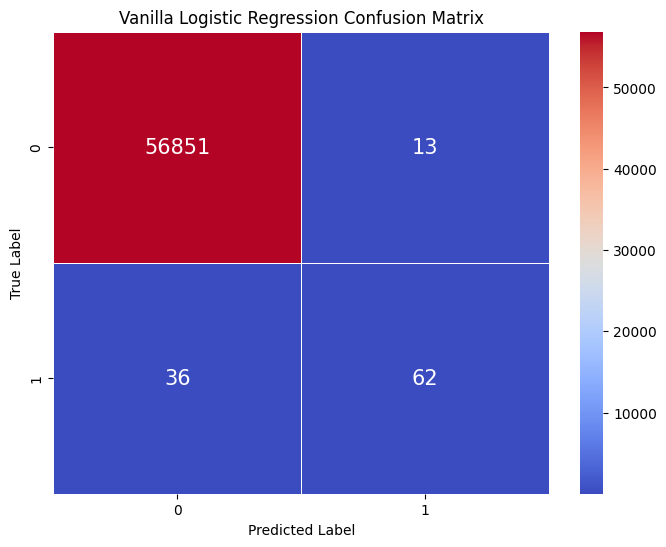

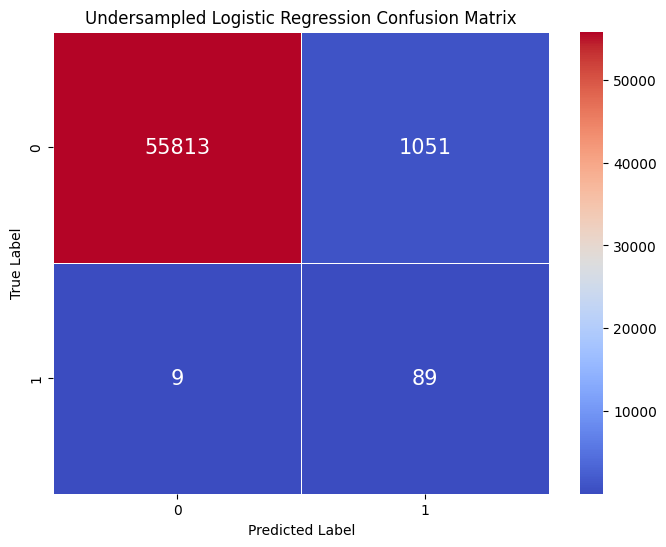

,Model Name,Average Precision,ROC AUC,Precision,Recall,F1 Score,Parameters
0,Vanilla Logistic Regression,0.74,0.96,0.83,0.63,0.72,{}
0,Undersampled Logistic Regression,0.49,0.98,0.08,0.91,0.14,{}


In [110]:
#Under Sampling for Logistic Regression
vanilla_lr = LogisticRegression(C=0.1, random_state=0)
vanilla_lr.fit(X_train_scaled, y_train)
vanilla_lr_preds = vanilla_lr.predict(X_test_scaled)

vanilla_lr_perf_df = model_performance(vanilla_lr, 'Vanilla Logistic Regression', X_train_scaled, y_train, X_test_scaled, y_test)

undersampled_lr = LogisticRegression(C=0.1, random_state=0)
undersampled_lr.fit(X_train_undersampled, y_train_undersampled)
undersampled_lr_preds = undersampled_lr.predict(X_test_scaled)

undersampled_lr_perf_df = model_performance(undersampled_lr, 'Undersampled Logistic Regression', X_train_undersampled, y_train_undersampled, X_test_scaled, y_test)

# Plot the confusion matrix for the vanilla logistic regression model
plot_confusion_matrix(y_test, vanilla_lr_preds, 'Vanilla Logistic Regression')

# Plot the confusion matrix for the undersampled logistic regression model
plot_confusion_matrix(y_test, undersampled_lr_preds, 'Undersampled Logistic Regression')

pd.concat([vanilla_lr_perf_df, undersampled_lr_perf_df])


Recall baya arttı fakat FP sayımız arttı bu kotu

Model fit complete: Vanilla Decision Tree Classifier
Model scoring complete: Vanilla Decision Tree Classifier
{}
Model performance added to the performance dataframe: Vanilla Decision Tree Classifier
Model fit complete: Undersampled Decision Tree Classifier
Model scoring complete: Undersampled Decision Tree Classifier
{}
Model performance added to the performance dataframe: Undersampled Decision Tree Classifier


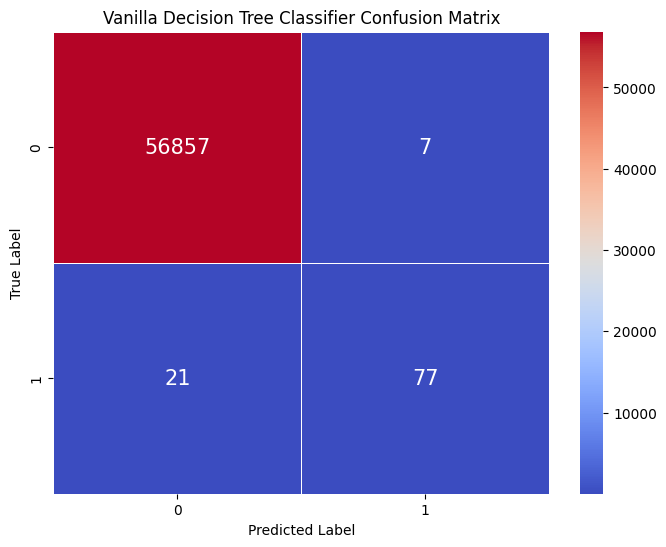

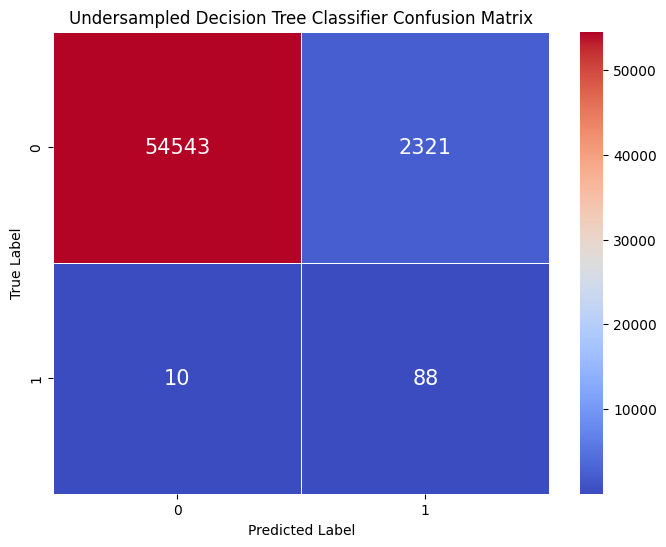

,Model Name,Average Precision,ROC AUC,Precision,Recall,F1 Score,Parameters
0,Vanilla Decision Tree Classifier,0.76,0.90,0.92,0.79,0.85,{}
0,Undersampled Decision Tree Classifier,0.04,0.92,0.04,0.90,0.07,{}


In [111]:
#Under Sampling for Decision Tree Classifier
vanilla_dt = DecisionTreeClassifier(max_depth=6, random_state=0)
vanilla_dt.fit(X_train_scaled, y_train)
vanilla_dt_preds = vanilla_dt.predict(X_test_scaled)

vanilla_dt_perf_df = model_performance(vanilla_dt, 'Vanilla Decision Tree Classifier', X_train_scaled, y_train, X_test_scaled, y_test)

undersampled_dt = DecisionTreeClassifier(max_depth=6, random_state=0)
undersampled_dt.fit(X_train_undersampled, y_train_undersampled)
undersampled_dt_preds = undersampled_dt.predict(X_test_scaled)

undersampled_dt_perf_df = model_performance(undersampled_dt, 'Undersampled Decision Tree Classifier', X_train_undersampled, y_train_undersampled, X_test_scaled, y_test)

# Plot the confusion matrix for the vanilla Decision Tree classifier
plot_confusion_matrix(y_test, vanilla_dt_preds, 'Vanilla Decision Tree Classifier')

# Plot the confusion matrix for the undersampled Decision Tree classifier
plot_confusion_matrix(y_test, undersampled_dt_preds, 'Undersampled Decision Tree Classifier')

pd.concat([vanilla_dt_perf_df, undersampled_dt_perf_df])


Bu da baya kotu oldu

Model fit complete: Vanilla XGBoost Classifier
Model scoring complete: Vanilla XGBoost Classifier
{}
Model performance added to the performance dataframe: Vanilla XGBoost Classifier
Model fit complete: Undersampled XGBoost Classifier
Model scoring complete: Undersampled XGBoost Classifier
{}
Model performance added to the performance dataframe: Undersampled XGBoost Classifier


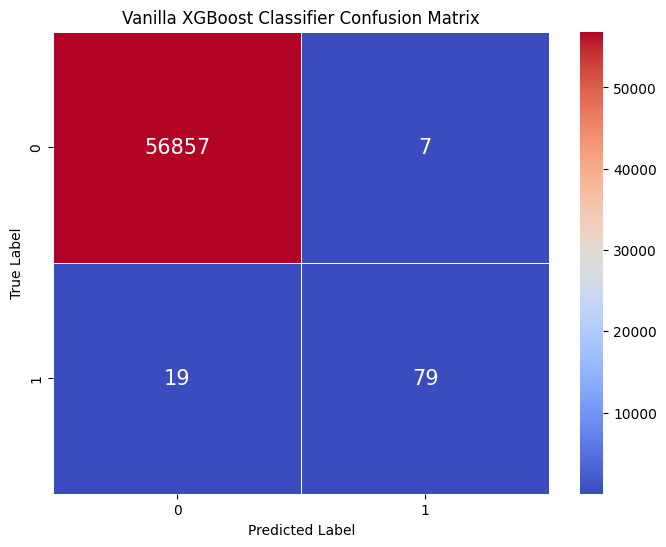

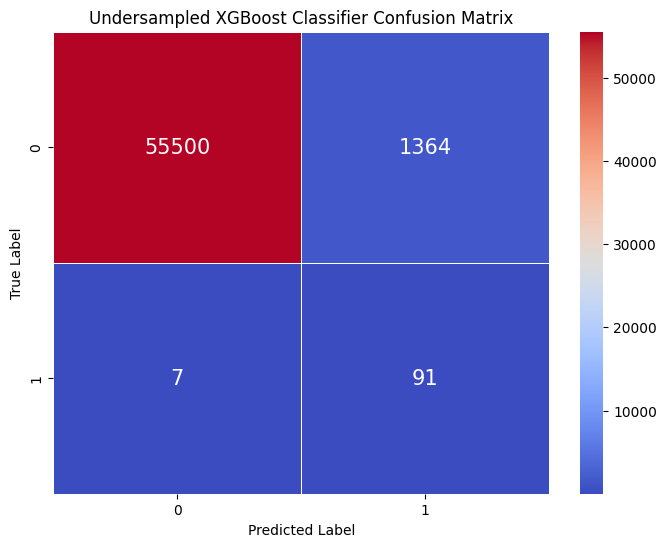

,Model Name,Average Precision,ROC AUC,Precision,Recall,F1 Score,Parameters
0,Vanilla XGBoost Classifier,0.88,0.97,0.92,0.81,0.86,{}
0,Undersampled XGBoost Classifier,0.76,0.98,0.06,0.93,0.12,{}


In [112]:
#Under Sampling for XGBoost Classifier

vanilla_xgb = XGBClassifier(booster='gbtree', max_depth=9, learning_rate=0.3, random_state=0)
vanilla_xgb.fit(X_train_scaled, y_train)
vanilla_xgb_preds = vanilla_xgb.predict(X_test_scaled)

vanilla_xgb_perf_df = model_performance(vanilla_xgb, 'Vanilla XGBoost Classifier', X_train_scaled, y_train, X_test_scaled, y_test)

undersampled_xgb = XGBClassifier(booster='gbtree', max_depth=9, learning_rate=0.3, random_state=0)
undersampled_xgb.fit(X_train_undersampled, y_train_undersampled)
undersampled_xgb_preds = undersampled_xgb.predict(X_test_scaled)

undersampled_xgb_perf_df = model_performance(undersampled_xgb, 'Undersampled XGBoost Classifier', X_train_undersampled, y_train_undersampled, X_test_scaled, y_test)

# Plot the confusion matrix for the vanilla XGBoost classifier
plot_confusion_matrix(y_test, vanilla_xgb_preds, 'Vanilla XGBoost Classifier')

# Plot the confusion matrix for the undersampled XGBoost classifier
plot_confusion_matrix(y_test, undersampled_xgb_preds, 'Undersampled XGBoost Classifier')

pd.concat([vanilla_xgb_perf_df, undersampled_xgb_perf_df])


XGBoost bile bozuldu hic bir ise yaramadı undersample